[polyline-ruler](https://polyline-ruler.readthedocs.io/): Init from mapbox/cheap-ruler but more than that.

Install: `pip install -U polyline-ruler`

## What is a ruler and what you can do with it

`polyline-ruler` originates from [mapbox/cheap-ruler](https://github.com/mapbox/cheap-ruler),
which provides fast approximations for common geodesic measurements:

> A collection of very fast approximations to common geodesic measurements.
> Useful for performance-sensitive code that measures things on a city scale. Can
> be an order of magnitude faster than corresponding Turf methods.
>
> The approximations are based on the WGS84 ellipsoid model of the Earth,
> projecting coordinates to a flat surface that approximates the ellipsoid around
> a certain latitude. For distances under 500 kilometers and not on the poles, the
> results are very precise — within 0.1% margin of error compared to Vincenti
> formulas, and usually much less for shorter distances.

Which means, you can quickly get distance between Shanghai and Suzhou, like this:

In [21]:
from polyline_ruler import PolylineRuler

gps_shanghai = [121.4952, 31.2419, 0.0]
gps_suzhou = [120.6747, 31.3189, 0.0]
distance = PolylineRuler._distance(gps_shanghai, gps_suzhou, is_wgs84=True)
print(f'distance between Shanghai & Suzhou: {distance/1000:.1f}km (static method)')

ruler = PolylineRuler([gps_shanghai, gps_suzhou], is_wgs84=True)

print(f'or construct PolylineRuler first, then use member function: {ruler.length()/1e3:.1f}km (member function)')

distance between Shanghai & Suzhou: 78.6km (static method)
or construct PolylineRuler first, then use member function: 78.6km (member function)


In [22]:
from ipyleaflet import Map, GeoJSON, basemaps, WidgetControl
from ipywidgets import Layout
import numpy as np

def show_geojson(*, geojson, center = None, zoom=10, layout=None, basemap=basemaps.Esri.WorldStreetMap):
    if center is None:
        coords = np.array([np.array(f['geometry']['coordinates']).reshape(-1)[:2] for f in geojson['features']])
        center = coords.mean(axis=0)
    lon, lat = center[:2]
    m = Map(
        center=[lat, lon],
        zoom=zoom,
        scroll_wheel_zoom=True,
        max_zoom=30,
        basemap=basemap,
    )
    if layout is not None:
        m.layout = layout
    m.add_layer(GeoJSON(data=geojson))
    return m

show_geojson(geojson={'type': 'FeatureCollection', 'features': [
    {
        'type': 'Feature',
        'geometry': {'type': 'LineString', 'coordinates': [gps_shanghai, gps_suzhou]},
        'properties': {'distance': distance},
    }
]}, zoom=9)

Map(center=[31.2419, 121.4952], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [23]:
beauty_feet = [
    [120.74827946135764, 31.448204795366777],
    [120.74620885411491, 31.444671808351146],
    [120.74783575980638, 31.442526715525744],
    [120.74162393807808, 31.4339458532],
    [120.73940543031875, 31.430664727645606],
    [120.73629951945532, 31.423597297964193],
    [120.73378521065985, 31.420568236465343],
    [120.7287565930717, 31.417539077136567],
    [120.72431957755157, 31.416529335620908],
    [120.72313637341284, 31.41539336342359],
    [120.71529764599455, 31.41362626821943],
    [120.71204383461452, 31.40946084068321],
    [120.7142623423739, 31.403022998034828],
    [120.71056482944107, 31.392544780517753],
    [120.71263543668385, 31.388125904492398],
    [120.7144102428905, 31.38698958847614],
    [120.71722035272069, 31.391787273682],
    [120.71500184495983, 31.395322253295006],
    [120.73511631531659, 31.419179883916897],
    [120.74103233600874, 31.423723506736835],
    [120.74443404790827, 31.424102132035657],
    [120.74620885411491, 31.427888300943067],
    [120.74931476497972, 31.428519314231295],
    [120.7589282986047, 31.439119702465206],
    [120.76144260740017, 31.444040903794075],
    [120.75108957118778, 31.448330971010606]
]

show_geojson(geojson={'type': 'FeatureCollection', 'features': [
    {
        'type': 'Feature',
        'geometry': {'type': 'LineString', 'coordinates': beauty_feet},
        'properties': {'distance': distance},
    }
]}, zoom=13, center=[120.735122, 31.4213], layout=Layout(width='80%', height='800px'))


Map(center=[31.4213, 120.735122], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [24]:
ruler = PolylineRuler(np.c_[beauty_feet, np.zeros(len(beauty_feet))], is_wgs84=True)

In [25]:
# APIs:
# https://github.com/cubao/polyline-ruler/blob/master/src/polyline_ruler.hpp

from pprint import pprint
pprint({
    'shape': ruler.polyline().shape,
    'N': ruler.N(),
    'is_wgs84': ruler.is_wgs84(),
    'ranges': ruler.ranges(),
    'ranges.shape': ruler.ranges().shape,
    'length': ruler.length(),
})




{'N': 26,
 'is_wgs84': True,
 'length': 18042.970237876994,
 'ranges': array([    0.        ,   438.39371091,   722.09042528,  1841.84479117,
        2262.34694775,  3099.73384723,  3511.94406245,  4096.13828784,
        4532.50404611,  4701.36361104,  5471.80115866,  6027.64874941,
        6771.95703552,  7985.75141991,  8513.75899485,  8724.31722722,
        9319.5691501 ,  9764.64655417, 13028.55274995, 13783.55654807,
       14109.61893727, 14562.04879782, 14865.45712118, 16354.24121552,
       16949.93602344, 18042.97023788]),
 'ranges.shape': (26,),
 'shape': (26, 3)}


In [26]:
# range (mileage in meters) interpolation
help(ruler.range)
print(ruler.range(0)) # range of first point (always 0.0)
print(ruler.range(1)) # range of second point (length of first segment)
print(ruler.range(segment_index=0, t=0.5)) # middle of first segment
print(ruler.length(), ruler.range(ruler.N() - 1)) # length of polyline

Help on method range in module polyline_ruler:

range(...) method of polyline_ruler.PolylineRuler instance
    range(*args, **kwargs)
    Overloaded function.
    
    1. range(self: polyline_ruler.PolylineRuler, segment_index: int) -> float
    
    2. range(self: polyline_ruler.PolylineRuler, *, segment_index: int, t: float) -> float

0.0
438.3937109139941
219.19685545699704
18042.970237876994 18042.970237876994


In [27]:
# dirs in ENU
dirs = ruler.dirs()
print(dirs, dirs.shape)

dx = dirs[:, 0]
dy = dirs[:, 1]
heading = np.degrees(np.arctan2(dx, dy)) # https://en.wikipedia.org/wiki/Atan2
heading[heading < 0] += 360.0
# clockwise heading angle, north: 0, east:90, ...
print(heading)

[[-0.44895912 -0.8935523   0.        ]
 [ 0.54510663 -0.83836673  0.        ]
 [-0.52731437 -0.84967026  0.        ]
 [-0.50149443 -0.86516087  0.        ]
 [-0.35256258 -0.93578824  0.        ]
 [-0.57979338 -0.81476355  0.        ]
 [-0.81820992 -0.57491959  0.        ]
 [-0.96652629 -0.25656759  0.        ]
 [-0.66605087 -0.74590632  0.        ]
 [-0.96712255 -0.25431077  0.        ]
 [-0.55642936 -0.83089492  0.        ]
 [ 0.28332277 -0.95902461  0.        ]
 [-0.2895596  -0.95715999  0.        ]
 [ 0.37276143 -0.92792722  0.        ]
 [ 0.80122059 -0.59836909  0.        ]
 [ 0.44874113  0.89366179  0.        ]
 [-0.47380408  0.88063028  0.        ]
 [ 0.58579319  0.81046057  0.        ]
 [ 0.74482447  0.66726045  0.        ]
 [ 0.99167693  0.12875117  0.        ]
 [ 0.37288341  0.9278782   0.        ]
 [ 0.97304939  0.23059679  0.        ]
 [ 0.61379694  0.78946394  0.        ]
 [ 0.40120671  0.91598754  0.        ]
 [-0.9003417   0.43518367  0.        ]] (25, 3)
[206.676922   14

In [28]:
print(ruler.range(1))
print(ruler.dir(100)) # dir at range=100m, should be like first dir (heading=206.67922)
print(ruler.along(100)) # postion at range=100m

438.3937109139941
[-0.44895912 -0.8935523   0.        ]
[120.74780714  31.4473989    0.        ]


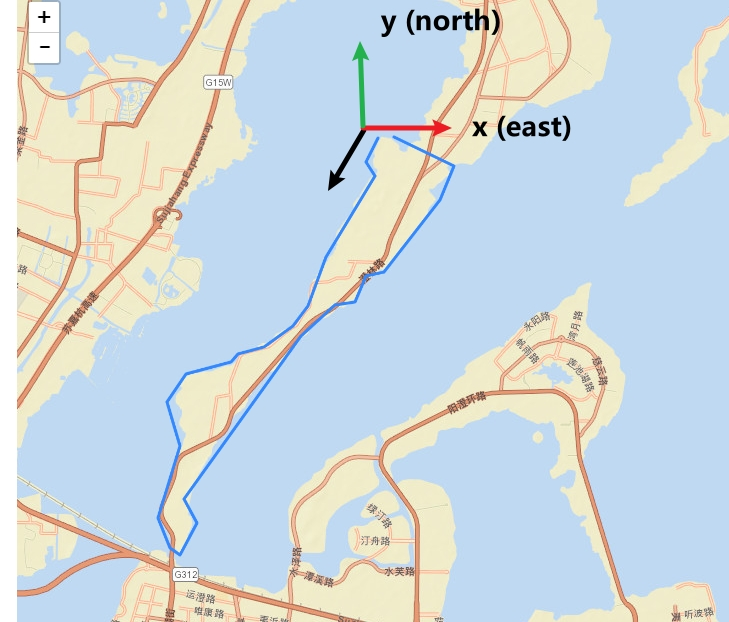![](ENU.jpg)

## arrows

In [29]:
from polyline_ruler.tf import ecef2lla

'''
           x
           ^
           |
     y     |
     <-----+
'''
def arrow():
    return [
        [0, -10, 0],
        [200, -10, 0],
        [200, -50, 0],
        [300, 0, 0],
        [200, 50, 0],
        [200, 10, 0],
        [0, 10, 0],
    ]
arrow = np.array(arrow()) * 2.0


import ipywidgets as widgets
slider = widgets.IntSlider(0, min=-1000, max=ruler.length() + 1000, step=10)
output = widgets.Output()

def show_map(range_meters):
    T_ecef_frenet = ruler.local_frame(range_meters)
    ecef = (T_ecef_frenet[:3, :3] @ arrow.T + T_ecef_frenet[:3, 3][:, np.newaxis]).T
    llas = ecef2lla(ecef)
    return show_geojson(geojson={'type': 'FeatureCollection', 'features': [
        {
            'type': 'Feature',
            'geometry': {'type': 'LineString', 'coordinates': beauty_feet},
            'properties': {'distance': distance},
        },
        {
            'type': 'Feature',
            'geometry': {'type': 'LineString', 'coordinates': llas.tolist()},
            'properties': {},
        },
    ]}, zoom=13, center=[120.735122, 31.4213], layout=Layout(width='80%', height='800px'))

def handle_slider_change(change):
    with output:
        output.clear_output()
        display(show_map(range_meters=change.new))
slider.observe(handle_slider_change, names='value')
display(slider, output)

IntSlider(value=0, max=19042, min=-1000, step=10)

Output()

In [10]:
print(ruler.extended_along(-1000)) # backwards 1km
print(ruler.at(0)) # start point
print(ruler.arrow(0)) # start point, direction

[120.75300263  31.45626373   0.        ]
[120.74827946  31.4482048    0.        ]
(array([120.74827946,  31.4482048 ,   0.        ]), array([-0.44895912, -0.8935523 ,  0.        ]))


In [11]:
ranges, llas, dirs = ruler.arrows([0, 100, 200, 400, 800])
print(ranges)
print(llas)
print(dirs)

[  0. 100. 200. 400. 800.]
[[120.74827946  31.4482048    0.        ]
 [120.74780714  31.4473989    0.        ]
 [120.74733483  31.44659301   0.        ]
 [120.74639019  31.44498122   0.        ]
 [120.74740356  31.44192968   0.        ]]
[[-0.44895912 -0.8935523   0.        ]
 [-0.44895912 -0.8935523   0.        ]
 [-0.44895912 -0.8935523   0.        ]
 [-0.44895912 -0.8935523   0.        ]
 [-0.52731437 -0.84967026  0.        ]]


In [12]:
ranges, llas, dirs = ruler.arrows(1000) # every 1km
print(ranges)
print(llas)
print(dirs)

[    0.          1000.          2000.          3000.
  4000.          5000.          6000.          7000.
  8000.          9000.         10000.         11000.
 12000.         13000.         14000.         15000.
 16000.         17000.         18000.         18042.97023788]
[[120.74827946  31.4482048    0.        ]
 [120.74629406  31.44039705   0.        ]
 [120.74078953  31.43271179   0.        ]
 [120.73666944  31.42443904   0.        ]
 [120.72958413  31.41803757   0.        ]
 [120.72009793  31.4147084    0.        ]
 [120.71220568  31.40966804   0.        ]
 [120.71356767  31.40105439   0.        ]
 [120.71062071  31.39242553   0.        ]
 [120.71571171  31.38921157   0.        ]
 [120.71645226  31.39704258   0.        ]
 [120.72261496  31.40435211   0.        ]
 [120.72877765  31.41166164   0.        ]
 [120.73494035  31.41897118   0.        ]
 [120.74329043  31.42397484   0.        ]
 [120.75018355  31.42947728   0.        ]
 [120.75664085  31.43659745   0.        ]
 [120.760968

In [13]:
import k3d
import numpy as np

In [14]:
# from pybind11_geobuf import Decoder, Encoder

# encoder = Encoder(max_precision=int(10**8))
# encoder.encode(geojson='cloverleaf.json', geobuf='cloverleaf.pbf')

# decoder = Decoder()
# decoder.decode(geobuf='cloverleaf.pbf', geojson='cloverleaf.pbf.json', indent=True, sort_keys=True)

In [15]:
import json
with open('cloverleaf.pbf.json') as f:
    geojson = json.load(f)
show_geojson(geojson=geojson, basemap=basemaps.Gaode.Normal, zoom=16)

Map(center=[31.32049390261476, 120.68722507964208], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [16]:
polylines = [f['geometry']['coordinates'] for f in geojson['features'] if f['properties'].get('type') == 'lane_border']
print(f'#polylines: {len(polylines)}')

#polylines: 808


In [17]:
# filter out some polylines, for faster visualization
from shapely import Polygon, LineString

bbox = [[120.68778, 31.31983], [120.68778, 31.31827], [120.68933, 31.31827], [120.68933, 31.31983], [120.68778, 31.31983]]
polygon = Polygon(bbox)
polylines = [p for p in polylines if not polygon.disjoint(LineString(p))]
print(f'#polylines: {len(polylines)} (filter by bbox)')

#polylines: 113 (filter by bbox)


In [18]:
# convert to ENU
from polyline_ruler.tf import lla2enu
anchor = polylines[0][0]
polylines = [lla2enu(llas, anchor_lla=anchor).astype(np.float32) for llas in polylines]

In [19]:
import k3d
import numpy as np

plot = k3d.plot()
for polyline in polylines:
    plot += k3d.line(polyline)

plot.display()

Output()

In [20]:
id2feature = {f['properties']['id']: f for f in geojson['features']}

left_lane_border = id2feature.get('w1268')
print(left_lane_border)

coords = lla2enu(left_lane_border['geometry']['coordinates'], anchor_lla=anchor)
print(coords)
ruler = PolylineRuler(coords)
print(ruler.length())
scanlines = []
for r in np.arange(0, ruler.length(), 10):
    ls = ruler.scanline(range=r, min=-10, max=10)
    scanlines.append(ls)
    
plot = k3d.plot()
for polyline in polylines:
    plot += k3d.line(polyline)
for line in scanlines:
    plot += k3d.line(line, color=0xff0000)
plot.display()

{'geometry': {'coordinates': [[120.68743528, 31.3198304, 3.403], [120.68749578, 31.3198145, 3.693], [120.68754678, 31.3197994, 3.932], [120.68759647, 31.3197833, 4.163], [120.68764497, 31.3197662, 4.387], [120.68769227, 31.3197481, 4.608], [120.68773856, 31.3197292, 4.826], [120.68781206, 31.3196965, 5.185], [120.68786916, 31.3196683, 5.479], [120.68794345, 31.3196281, 5.869], [120.68799645, 31.3195969, 6.141], [120.68802185, 31.3195811, 6.264], [120.68809194, 31.3195345, 6.561], [120.68813924, 31.3194999, 6.704], [120.68820293, 31.3194497, 6.84], [120.68826313, 31.319398, 6.907], [120.68830553, 31.3193585, 6.915], [120.68835772, 31.3193056, 6.875], [120.68841782, 31.3192382, 6.732], [120.68845902, 31.3191888, 6.559]], 'type': 'LineString'}, 'properties': {'id': 'w1268', 'length': 123.181, 'stroke': '#ffffff', 'type': 'lane_border'}, 'type': 'Feature'}
[[-185.22038027  208.81189271    2.269     ]
 [-179.46163204  207.04898108    2.559     ]
 [-174.60715006  205.37476941    2.798     ]


Output()